# Building our first neural network
## Using Tensorflow 2.0

In [2]:
import tensorflow as tf 

import numpy as np 
import matplotlib.pyplot as plt

### Creating data

In [4]:
def fn(x, A=1, B=1, C=0., D=0.):
    pi2 = 6.2831 # 2*pi
    return A*tf.math.sin(pi2/B*(x+C))+D

In [8]:
x = np.random.uniform(size=[20, 100])
x = np.sort(x, axis=1)

y = fn(x)

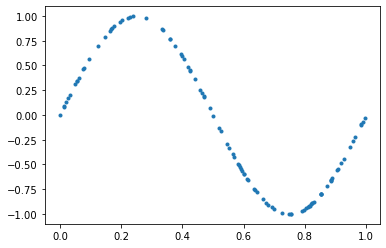

In [9]:
plt.plot(x[0], y[0], '.')
plt.show()

### Building the hidden layer

In [10]:
from tensorflow.keras.layers import Layer

In [11]:
class HiddenLayer(Layer):
    def __init__(self, num_outputs):
        super(HiddenLayer, self).__init__()
        self.num_outputs = num_outputs

    def build(self, input_shape):
        
        w_value = tf.random.normal(shape=[int(input_shape[-1]),
                                         self.num_outputs])
        bias_value = tf.zeros([self.num_outputs])
        
        self.W = tf.Variable(initial_value=w_value)
        self.b = tf.Variable(initial_value=bias_value)

    def call(self, inputs):
        product = tf.matmul(inputs, self.W)
        return product +self.b

### Building the model architecture

In [15]:
from tensorflow.keras import Model, Input

In [16]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.h1 = HiddenLayer(num_outputs=128)
        self.h2 = HiddenLayer(num_outputs=128)
        self.out = HiddenLayer(num_outputs=1)
    def call(self, x):
        x = self.h1(x)
        x = self.h2(x)
        x = self.out(x)
        return x

### Creating the model

In [17]:
inp = Input(shape=(100), batch_size=None,
           dtype=tf.float32)

In [19]:
model = MyModel()
model(x)
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (HiddenLayer)  multiple                  12928     
                                                                 
 hidden_layer_1 (HiddenLayer  multiple                 16512     
 )                                                               
                                                                 
 hidden_layer_2 (HiddenLayer  multiple                 129       
 )                                                               
                                                                 
Total params: 29,569
Trainable params: 29,569
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

Here we define our `loss`, performance `metric`, and `optimizer` algorithm.

In [20]:
model.compile(loss='mse', optimizer='adam', metrics='mse')

Alternatively, you can import the objects from Tensorflow

In [21]:
loss_obj = tf.keras.losses.MeanSquaredError() 
opt_obj = tf.keras.optimizers.Adam()
metric = tf.keras.metrics.MeanAbsoluteError()

In [22]:
model.compile(loss=loss_obj, 
              optimizer=opt_obj, 
              metrics=metric)

### Training

For training we can use the `.fit()` method that includes all the necessary for the optimization of parameters

In [27]:
history = model.fit(x, y, 
                    epochs=200, 
                    validation_split=0.3)

Epoch 1/200
1/1 [==============================] - 0s 38ms/step - loss: 230.5626 - mean_absolute_error: 13.1628 - val_loss: 110.7231 - val_mean_absolute_error: 8.9966
Epoch 2/200
1/1 [==============================] - 0s 19ms/step - loss: 229.7052 - mean_absolute_error: 13.1392 - val_loss: 110.6239 - val_mean_absolute_error: 8.9963
Epoch 3/200
1/1 [==============================] - 0s 18ms/step - loss: 228.8515 - mean_absolute_error: 13.1155 - val_loss: 110.5230 - val_mean_absolute_error: 8.9959
Epoch 4/200
1/1 [==============================] - 0s 19ms/step - loss: 228.0038 - mean_absolute_error: 13.0919 - val_loss: 110.4306 - val_mean_absolute_error: 8.9958
Epoch 5/200
1/1 [==============================] - 0s 18ms/step - loss: 227.1562 - mean_absolute_error: 13.0681 - val_loss: 110.3365 - val_mean_absolute_error: 8.9954
Epoch 6/200
1/1 [==============================] - 0s 23ms/step - loss: 226.3091 - mean_absolute_error: 13.0443 - val_loss: 110.2447 - val_mean_absolute_error: 8.995

Epoch 50/200
1/1 [==============================] - 0s 29ms/step - loss: 191.7162 - mean_absolute_error: 11.9845 - val_loss: 108.0326 - val_mean_absolute_error: 8.9674
Epoch 51/200
1/1 [==============================] - 0s 19ms/step - loss: 190.9867 - mean_absolute_error: 11.9603 - val_loss: 108.0192 - val_mean_absolute_error: 8.9665
Epoch 52/200
1/1 [==============================] - 0s 18ms/step - loss: 190.2577 - mean_absolute_error: 11.9360 - val_loss: 108.0016 - val_mean_absolute_error: 8.9654
Epoch 53/200
1/1 [==============================] - 0s 19ms/step - loss: 189.5334 - mean_absolute_error: 11.9119 - val_loss: 107.9844 - val_mean_absolute_error: 8.9642
Epoch 54/200
1/1 [==============================] - 0s 19ms/step - loss: 188.8088 - mean_absolute_error: 11.8875 - val_loss: 107.9755 - val_mean_absolute_error: 8.9633
Epoch 55/200
1/1 [==============================] - 0s 18ms/step - loss: 188.0883 - mean_absolute_error: 11.8634 - val_loss: 107.9612 - val_mean_absolute_error:

Epoch 99/200
1/1 [==============================] - 0s 19ms/step - loss: 158.6833 - mean_absolute_error: 10.8273 - val_loss: 108.4138 - val_mean_absolute_error: 8.8943
Epoch 100/200
1/1 [==============================] - 0s 17ms/step - loss: 158.0649 - mean_absolute_error: 10.8050 - val_loss: 108.4455 - val_mean_absolute_error: 8.8924
Epoch 101/200
1/1 [==============================] - 0s 26ms/step - loss: 157.4483 - mean_absolute_error: 10.7826 - val_loss: 108.4730 - val_mean_absolute_error: 8.8903
Epoch 102/200
1/1 [==============================] - 0s 17ms/step - loss: 156.8367 - mean_absolute_error: 10.7603 - val_loss: 108.5056 - val_mean_absolute_error: 8.8882
Epoch 103/200
1/1 [==============================] - 0s 17ms/step - loss: 156.2226 - mean_absolute_error: 10.7379 - val_loss: 108.5366 - val_mean_absolute_error: 8.8862
Epoch 104/200
1/1 [==============================] - 0s 18ms/step - loss: 155.6174 - mean_absolute_error: 10.7158 - val_loss: 108.5670 - val_mean_absolute_e

1/1 [==============================] - 0s 18ms/step - loss: 131.4538 - mean_absolute_error: 9.8136 - val_loss: 110.5354 - val_mean_absolute_error: 8.7740
Epoch 148/200
1/1 [==============================] - 0s 18ms/step - loss: 130.9369 - mean_absolute_error: 9.7937 - val_loss: 110.5909 - val_mean_absolute_error: 8.7709
Epoch 149/200
1/1 [==============================] - 0s 18ms/step - loss: 130.4238 - mean_absolute_error: 9.7740 - val_loss: 110.6504 - val_mean_absolute_error: 8.7679
Epoch 150/200
1/1 [==============================] - 0s 18ms/step - loss: 129.9112 - mean_absolute_error: 9.7543 - val_loss: 110.7043 - val_mean_absolute_error: 8.7647
Epoch 151/200
1/1 [==============================] - 0s 18ms/step - loss: 129.4005 - mean_absolute_error: 9.7348 - val_loss: 110.7675 - val_mean_absolute_error: 8.7618
Epoch 152/200
1/1 [==============================] - 0s 19ms/step - loss: 128.8919 - mean_absolute_error: 9.7153 - val_loss: 110.8259 - val_mean_absolute_error: 8.7586
Epoch 

Epoch 196/200
1/1 [==============================] - 0s 18ms/step - loss: 108.4158 - mean_absolute_error: 8.8949 - val_loss: 113.8232 - val_mean_absolute_error: 8.6042
Epoch 197/200
1/1 [==============================] - 0s 18ms/step - loss: 107.9928 - mean_absolute_error: 8.8768 - val_loss: 113.8963 - val_mean_absolute_error: 8.6001
Epoch 198/200
1/1 [==============================] - 0s 19ms/step - loss: 107.5697 - mean_absolute_error: 8.8587 - val_loss: 113.9732 - val_mean_absolute_error: 8.5963
Epoch 199/200
1/1 [==============================] - 0s 18ms/step - loss: 107.1504 - mean_absolute_error: 8.8406 - val_loss: 114.0492 - val_mean_absolute_error: 8.5924
Epoch 200/200
1/1 [==============================] - 0s 19ms/step - loss: 106.7335 - mean_absolute_error: 8.8226 - val_loss: 114.1295 - val_mean_absolute_error: 8.5885


### Visualizing training (off-line)

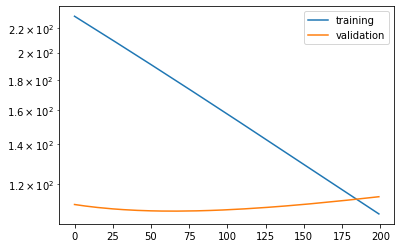

In [28]:
plt.figure()
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.yscale('log')
plt.show()

### Callbacks

In [29]:
from tensorflow.keras.callbacks import EarlyStopping 

In [30]:
es_cb = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=20,
        mode='min',
        restore_best_weights=True
    )

In [31]:
model = MyModel()
model.compile(loss='mse', optimizer='adam', metrics='mse')

In [33]:
hist = model.fit(x, y, epochs=100000, 
          callbacks=[es_cb], 
          validation_split=0.3)

Epoch 1/100000
1/1 [==============================] - 0s 38ms/step - loss: 3228.3757 - mse: 3228.3757 - val_loss: 1890.2163 - val_mse: 1890.2163
Epoch 2/100000
1/1 [==============================] - 0s 18ms/step - loss: 3430.9231 - mse: 3430.9231 - val_loss: 1988.8022 - val_mse: 1988.8022
Epoch 3/100000
1/1 [==============================] - 0s 17ms/step - loss: 3592.0242 - mse: 3592.0242 - val_loss: 2042.5790 - val_mse: 2042.5790
Epoch 4/100000
1/1 [==============================] - 0s 18ms/step - loss: 3675.9041 - mse: 3675.9041 - val_loss: 2037.0433 - val_mse: 2037.0433
Epoch 5/100000
1/1 [==============================] - 0s 19ms/step - loss: 3668.4683 - mse: 3668.4683 - val_loss: 1976.8057 - val_mse: 1976.8057
Epoch 6/100000
1/1 [==============================] - 0s 19ms/step - loss: 3576.7004 - mse: 3576.7004 - val_loss: 1881.2208 - val_mse: 1881.2208
Epoch 7/100000
1/1 [==============================] - 0s 19ms/step - loss: 3424.1897 - mse: 3424.1897 - val_loss: 1777.6553 - val_

1/1 [==============================] - 0s 19ms/step - loss: 2412.6152 - mse: 2412.6152 - val_loss: 1449.0399 - val_mse: 1449.0399
Epoch 58/100000
1/1 [==============================] - 0s 18ms/step - loss: 2402.7163 - mse: 2402.7163 - val_loss: 1454.0424 - val_mse: 1454.0424
Epoch 59/100000
1/1 [==============================] - 0s 19ms/step - loss: 2393.5100 - mse: 2393.5100 - val_loss: 1457.7437 - val_mse: 1457.7437
Epoch 60/100000
1/1 [==============================] - 0s 18ms/step - loss: 2384.7480 - mse: 2384.7480 - val_loss: 1459.1925 - val_mse: 1459.1925
Epoch 61/100000
1/1 [==============================] - 0s 18ms/step - loss: 2376.0977 - mse: 2376.0977 - val_loss: 1457.6857 - val_mse: 1457.6857
Epoch 62/100000
1/1 [==============================] - 0s 18ms/step - loss: 2367.2678 - mse: 2367.2678 - val_loss: 1452.9330 - val_mse: 1452.9330
Epoch 63/100000
1/1 [==============================] - 0s 19ms/step - loss: 2358.0288 - mse: 2358.0288 - val_loss: 1445.0221 - val_mse: 1445

1/1 [==============================] - 0s 19ms/step - loss: 1896.7346 - mse: 1896.7346 - val_loss: 1116.9497 - val_mse: 1116.9497
Epoch 114/100000
1/1 [==============================] - 0s 19ms/step - loss: 1888.0247 - mse: 1888.0247 - val_loss: 1112.1144 - val_mse: 1112.1144
Epoch 115/100000
1/1 [==============================] - 0s 18ms/step - loss: 1879.3431 - mse: 1879.3431 - val_loss: 1107.4073 - val_mse: 1107.4073
Epoch 116/100000
1/1 [==============================] - 0s 18ms/step - loss: 1870.6986 - mse: 1870.6986 - val_loss: 1102.7308 - val_mse: 1102.7308
Epoch 117/100000
1/1 [==============================] - 0s 20ms/step - loss: 1862.0862 - mse: 1862.0862 - val_loss: 1098.0004 - val_mse: 1098.0004
Epoch 118/100000
1/1 [==============================] - 0s 19ms/step - loss: 1853.4952 - mse: 1853.4952 - val_loss: 1093.1471 - val_mse: 1093.1471
Epoch 119/100000
1/1 [==============================] - 0s 18ms/step - loss: 1844.9338 - mse: 1844.9338 - val_loss: 1088.1201 - val_mse

1/1 [==============================] - 0s 18ms/step - loss: 1457.9427 - mse: 1457.9427 - val_loss: 851.5278 - val_mse: 851.5278
Epoch 170/100000
1/1 [==============================] - 0s 18ms/step - loss: 1451.0970 - mse: 1451.0970 - val_loss: 847.5607 - val_mse: 847.5607
Epoch 171/100000
1/1 [==============================] - 0s 18ms/step - loss: 1444.2732 - mse: 1444.2732 - val_loss: 843.5945 - val_mse: 843.5945
Epoch 172/100000
1/1 [==============================] - 0s 19ms/step - loss: 1437.4940 - mse: 1437.4940 - val_loss: 839.6503 - val_mse: 839.6503
Epoch 173/100000
1/1 [==============================] - 0s 19ms/step - loss: 1430.7576 - mse: 1430.7576 - val_loss: 835.7036 - val_mse: 835.7036
Epoch 174/100000
1/1 [==============================] - 0s 21ms/step - loss: 1424.0433 - mse: 1424.0433 - val_loss: 831.7797 - val_mse: 831.7797
Epoch 175/100000
1/1 [==============================] - 0s 20ms/step - loss: 1417.3730 - mse: 1417.3730 - val_loss: 827.8684 - val_mse: 827.8684
Ep

1/1 [==============================] - 0s 22ms/step - loss: 1129.0502 - mse: 1129.0502 - val_loss: 666.7573 - val_mse: 666.7573
Epoch 226/100000
1/1 [==============================] - 0s 25ms/step - loss: 1124.1583 - mse: 1124.1583 - val_loss: 664.1589 - val_mse: 664.1589
Epoch 227/100000
1/1 [==============================] - 0s 20ms/step - loss: 1119.2947 - mse: 1119.2947 - val_loss: 661.5795 - val_mse: 661.5795
Epoch 228/100000
1/1 [==============================] - 0s 20ms/step - loss: 1114.4594 - mse: 1114.4594 - val_loss: 659.0262 - val_mse: 659.0262
Epoch 229/100000
1/1 [==============================] - 0s 19ms/step - loss: 1109.6639 - mse: 1109.6639 - val_loss: 656.4940 - val_mse: 656.4940
Epoch 230/100000
1/1 [==============================] - 0s 18ms/step - loss: 1104.8998 - mse: 1104.8998 - val_loss: 653.9835 - val_mse: 653.9835
Epoch 231/100000
1/1 [==============================] - 0s 18ms/step - loss: 1100.1632 - mse: 1100.1632 - val_loss: 651.5024 - val_mse: 651.5024
Ep

1/1 [==============================] - 0s 19ms/step - loss: 897.4788 - mse: 897.4788 - val_loss: 551.0943 - val_mse: 551.0943
Epoch 283/100000
1/1 [==============================] - 0s 19ms/step - loss: 894.1874 - mse: 894.1874 - val_loss: 549.5837 - val_mse: 549.5837
Epoch 284/100000
1/1 [==============================] - 0s 18ms/step - loss: 890.9279 - mse: 890.9279 - val_loss: 548.0977 - val_mse: 548.0977
Epoch 285/100000
1/1 [==============================] - 0s 18ms/step - loss: 887.6993 - mse: 887.6993 - val_loss: 546.6152 - val_mse: 546.6152
Epoch 286/100000
1/1 [==============================] - 0s 19ms/step - loss: 884.4824 - mse: 884.4824 - val_loss: 545.1470 - val_mse: 545.1470
Epoch 287/100000
1/1 [==============================] - 0s 19ms/step - loss: 881.2910 - mse: 881.2910 - val_loss: 543.7019 - val_mse: 543.7019
Epoch 288/100000
1/1 [==============================] - 0s 19ms/step - loss: 878.1273 - mse: 878.1273 - val_loss: 542.2546 - val_mse: 542.2546
Epoch 289/100000

1/1 [==============================] - 0s 21ms/step - loss: 743.5843 - mse: 743.5843 - val_loss: 485.6192 - val_mse: 485.6192
Epoch 340/100000
1/1 [==============================] - 0s 20ms/step - loss: 741.4083 - mse: 741.4083 - val_loss: 484.7853 - val_mse: 484.7853
Epoch 341/100000
1/1 [==============================] - 0s 21ms/step - loss: 739.2443 - mse: 739.2443 - val_loss: 483.9507 - val_mse: 483.9507
Epoch 342/100000
1/1 [==============================] - 0s 20ms/step - loss: 737.0967 - mse: 737.0967 - val_loss: 483.1275 - val_mse: 483.1275
Epoch 343/100000
1/1 [==============================] - 0s 21ms/step - loss: 734.9668 - mse: 734.9668 - val_loss: 482.3284 - val_mse: 482.3284
Epoch 344/100000
1/1 [==============================] - 0s 21ms/step - loss: 732.8486 - mse: 732.8486 - val_loss: 481.5258 - val_mse: 481.5258
Epoch 345/100000
1/1 [==============================] - 0s 19ms/step - loss: 730.7511 - mse: 730.7511 - val_loss: 480.7245 - val_mse: 480.7245
Epoch 346/100000

1/1 [==============================] - 0s 18ms/step - loss: 640.3046 - mse: 640.3046 - val_loss: 449.1316 - val_mse: 449.1316
Epoch 397/100000
1/1 [==============================] - 0s 19ms/step - loss: 638.8122 - mse: 638.8122 - val_loss: 448.6531 - val_mse: 448.6531
Epoch 398/100000
1/1 [==============================] - 0s 19ms/step - loss: 637.3291 - mse: 637.3291 - val_loss: 448.1764 - val_mse: 448.1764
Epoch 399/100000
1/1 [==============================] - 0s 19ms/step - loss: 635.8481 - mse: 635.8481 - val_loss: 447.7057 - val_mse: 447.7057
Epoch 400/100000
1/1 [==============================] - 0s 19ms/step - loss: 634.3801 - mse: 634.3801 - val_loss: 447.2404 - val_mse: 447.2404
Epoch 401/100000
1/1 [==============================] - 0s 21ms/step - loss: 632.9169 - mse: 632.9169 - val_loss: 446.7744 - val_mse: 446.7744
Epoch 402/100000
1/1 [==============================] - 0s 19ms/step - loss: 631.4645 - mse: 631.4645 - val_loss: 446.3099 - val_mse: 446.3099
Epoch 403/100000

1/1 [==============================] - 0s 20ms/step - loss: 567.0594 - mse: 567.0594 - val_loss: 426.8258 - val_mse: 426.8258
Epoch 454/100000
1/1 [==============================] - 0s 20ms/step - loss: 565.9534 - mse: 565.9534 - val_loss: 426.5115 - val_mse: 426.5115
Epoch 455/100000
1/1 [==============================] - 0s 18ms/step - loss: 564.8558 - mse: 564.8558 - val_loss: 426.1879 - val_mse: 426.1879
Epoch 456/100000
1/1 [==============================] - 0s 18ms/step - loss: 563.7609 - mse: 563.7609 - val_loss: 425.8719 - val_mse: 425.8719
Epoch 457/100000
1/1 [==============================] - 0s 19ms/step - loss: 562.6697 - mse: 562.6697 - val_loss: 425.5560 - val_mse: 425.5560
Epoch 458/100000
1/1 [==============================] - 0s 18ms/step - loss: 561.5794 - mse: 561.5794 - val_loss: 425.2382 - val_mse: 425.2382
Epoch 459/100000
1/1 [==============================] - 0s 18ms/step - loss: 560.4992 - mse: 560.4992 - val_loss: 424.9229 - val_mse: 424.9229
Epoch 460/100000

1/1 [==============================] - 0s 20ms/step - loss: 510.7696 - mse: 510.7696 - val_loss: 410.3481 - val_mse: 410.3481
Epoch 511/100000
1/1 [==============================] - 0s 19ms/step - loss: 509.8835 - mse: 509.8835 - val_loss: 410.0830 - val_mse: 410.0830
Epoch 512/100000
1/1 [==============================] - 0s 18ms/step - loss: 508.9977 - mse: 508.9977 - val_loss: 409.8131 - val_mse: 409.8131
Epoch 513/100000
1/1 [==============================] - 0s 18ms/step - loss: 508.1141 - mse: 508.1141 - val_loss: 409.5558 - val_mse: 409.5558
Epoch 514/100000
1/1 [==============================] - 0s 19ms/step - loss: 507.2387 - mse: 507.2387 - val_loss: 409.2888 - val_mse: 409.2888
Epoch 515/100000
1/1 [==============================] - 0s 19ms/step - loss: 506.3647 - mse: 506.3647 - val_loss: 409.0304 - val_mse: 409.0304
Epoch 516/100000
1/1 [==============================] - 0s 19ms/step - loss: 505.4938 - mse: 505.4938 - val_loss: 408.7639 - val_mse: 408.7639
Epoch 517/100000

1/1 [==============================] - 0s 19ms/step - loss: 464.1772 - mse: 464.1772 - val_loss: 395.9037 - val_mse: 395.9037
Epoch 568/100000
1/1 [==============================] - 0s 18ms/step - loss: 463.4196 - mse: 463.4196 - val_loss: 395.6642 - val_mse: 395.6642
Epoch 569/100000
1/1 [==============================] - 0s 19ms/step - loss: 462.6676 - mse: 462.6676 - val_loss: 395.4213 - val_mse: 395.4213
Epoch 570/100000
1/1 [==============================] - 0s 18ms/step - loss: 461.9157 - mse: 461.9157 - val_loss: 395.1779 - val_mse: 395.1779
Epoch 571/100000
1/1 [==============================] - 0s 18ms/step - loss: 461.1629 - mse: 461.1629 - val_loss: 394.9339 - val_mse: 394.9339
Epoch 572/100000
1/1 [==============================] - 0s 19ms/step - loss: 460.4122 - mse: 460.4122 - val_loss: 394.6853 - val_mse: 394.6853
Epoch 573/100000
1/1 [==============================] - 0s 20ms/step - loss: 459.6680 - mse: 459.6680 - val_loss: 394.4364 - val_mse: 394.4364
Epoch 574/100000

1/1 [==============================] - 0s 19ms/step - loss: 423.6899 - mse: 423.6899 - val_loss: 382.3233 - val_mse: 382.3233
Epoch 625/100000
1/1 [==============================] - 0s 19ms/step - loss: 423.0230 - mse: 423.0230 - val_loss: 382.0981 - val_mse: 382.0981
Epoch 626/100000
1/1 [==============================] - 0s 19ms/step - loss: 422.3573 - mse: 422.3573 - val_loss: 381.8597 - val_mse: 381.8597
Epoch 627/100000
1/1 [==============================] - 0s 18ms/step - loss: 421.6921 - mse: 421.6921 - val_loss: 381.6328 - val_mse: 381.6328
Epoch 628/100000
1/1 [==============================] - 0s 18ms/step - loss: 421.0291 - mse: 421.0291 - val_loss: 381.4034 - val_mse: 381.4034
Epoch 629/100000
1/1 [==============================] - 0s 19ms/step - loss: 420.3651 - mse: 420.3651 - val_loss: 381.1713 - val_mse: 381.1713
Epoch 630/100000
1/1 [==============================] - 0s 20ms/step - loss: 419.7056 - mse: 419.7056 - val_loss: 380.9420 - val_mse: 380.9420
Epoch 631/100000

1/1 [==============================] - 0s 18ms/step - loss: 387.6467 - mse: 387.6467 - val_loss: 369.5716 - val_mse: 369.5716
Epoch 682/100000
1/1 [==============================] - 0s 19ms/step - loss: 387.0491 - mse: 387.0491 - val_loss: 369.3540 - val_mse: 369.3540
Epoch 683/100000
1/1 [==============================] - 0s 18ms/step - loss: 386.4492 - mse: 386.4492 - val_loss: 369.1411 - val_mse: 369.1411
Epoch 684/100000
1/1 [==============================] - 0s 19ms/step - loss: 385.8518 - mse: 385.8518 - val_loss: 368.9288 - val_mse: 368.9288
Epoch 685/100000
1/1 [==============================] - 0s 18ms/step - loss: 385.2588 - mse: 385.2588 - val_loss: 368.7175 - val_mse: 368.7175
Epoch 686/100000
1/1 [==============================] - 0s 18ms/step - loss: 384.6654 - mse: 384.6654 - val_loss: 368.5066 - val_mse: 368.5066
Epoch 687/100000
1/1 [==============================] - 0s 19ms/step - loss: 384.0714 - mse: 384.0714 - val_loss: 368.2943 - val_mse: 368.2943
Epoch 688/100000

1/1 [==============================] - 0s 19ms/step - loss: 355.2629 - mse: 355.2629 - val_loss: 357.9297 - val_mse: 357.9297
Epoch 739/100000
1/1 [==============================] - 0s 18ms/step - loss: 354.7249 - mse: 354.7249 - val_loss: 357.7352 - val_mse: 357.7352
Epoch 740/100000
1/1 [==============================] - 0s 19ms/step - loss: 354.1873 - mse: 354.1873 - val_loss: 357.5467 - val_mse: 357.5467
Epoch 741/100000
1/1 [==============================] - 0s 18ms/step - loss: 353.6503 - mse: 353.6503 - val_loss: 357.3550 - val_mse: 357.3550
Epoch 742/100000
1/1 [==============================] - 0s 19ms/step - loss: 353.1153 - mse: 353.1153 - val_loss: 357.1580 - val_mse: 357.1580
Epoch 743/100000
1/1 [==============================] - 0s 18ms/step - loss: 352.5813 - mse: 352.5813 - val_loss: 356.9675 - val_mse: 356.9675
Epoch 744/100000
1/1 [==============================] - 0s 19ms/step - loss: 352.0471 - mse: 352.0471 - val_loss: 356.7796 - val_mse: 356.7796
Epoch 745/100000

1/1 [==============================] - 0s 19ms/step - loss: 326.1139 - mse: 326.1139 - val_loss: 347.6493 - val_mse: 347.6493
Epoch 796/100000
1/1 [==============================] - 0s 20ms/step - loss: 325.6282 - mse: 325.6282 - val_loss: 347.4817 - val_mse: 347.4817
Epoch 797/100000
1/1 [==============================] - 0s 19ms/step - loss: 325.1464 - mse: 325.1464 - val_loss: 347.3182 - val_mse: 347.3182
Epoch 798/100000
1/1 [==============================] - 0s 18ms/step - loss: 324.6643 - mse: 324.6643 - val_loss: 347.1503 - val_mse: 347.1503
Epoch 799/100000
1/1 [==============================] - 0s 19ms/step - loss: 324.1823 - mse: 324.1823 - val_loss: 346.9878 - val_mse: 346.9878
Epoch 800/100000
1/1 [==============================] - 0s 19ms/step - loss: 323.7021 - mse: 323.7021 - val_loss: 346.8188 - val_mse: 346.8188
Epoch 801/100000
1/1 [==============================] - 0s 19ms/step - loss: 323.2229 - mse: 323.2229 - val_loss: 346.6619 - val_mse: 346.6619
Epoch 802/100000

1/1 [==============================] - 0s 21ms/step - loss: 299.8883 - mse: 299.8883 - val_loss: 338.8704 - val_mse: 338.8704
Epoch 853/100000
1/1 [==============================] - 0s 21ms/step - loss: 299.4553 - mse: 299.4553 - val_loss: 338.7244 - val_mse: 338.7244
Epoch 854/100000
1/1 [==============================] - 0s 21ms/step - loss: 299.0171 - mse: 299.0171 - val_loss: 338.5838 - val_mse: 338.5838
Epoch 855/100000
1/1 [==============================] - 0s 21ms/step - loss: 298.5844 - mse: 298.5844 - val_loss: 338.4484 - val_mse: 338.4484
Epoch 856/100000
1/1 [==============================] - 0s 20ms/step - loss: 298.1513 - mse: 298.1513 - val_loss: 338.3079 - val_mse: 338.3079
Epoch 857/100000
1/1 [==============================] - 0s 24ms/step - loss: 297.7205 - mse: 297.7205 - val_loss: 338.1700 - val_mse: 338.1700
Epoch 858/100000
1/1 [==============================] - 0s 22ms/step - loss: 297.2861 - mse: 297.2861 - val_loss: 338.0326 - val_mse: 338.0326
Epoch 859/100000

1/1 [==============================] - 0s 20ms/step - loss: 276.3028 - mse: 276.3028 - val_loss: 331.5612 - val_mse: 331.5612
Epoch 910/100000
1/1 [==============================] - 0s 21ms/step - loss: 275.9091 - mse: 275.9091 - val_loss: 331.4482 - val_mse: 331.4482
Epoch 911/100000
1/1 [==============================] - 0s 20ms/step - loss: 275.5206 - mse: 275.5206 - val_loss: 331.3294 - val_mse: 331.3294
Epoch 912/100000
1/1 [==============================] - 0s 22ms/step - loss: 275.1304 - mse: 275.1304 - val_loss: 331.2114 - val_mse: 331.2114
Epoch 913/100000
1/1 [==============================] - 0s 22ms/step - loss: 274.7422 - mse: 274.7422 - val_loss: 331.1048 - val_mse: 331.1048
Epoch 914/100000
1/1 [==============================] - 0s 22ms/step - loss: 274.3498 - mse: 274.3498 - val_loss: 330.9840 - val_mse: 330.9840
Epoch 915/100000
1/1 [==============================] - 0s 21ms/step - loss: 273.9624 - mse: 273.9624 - val_loss: 330.8769 - val_mse: 330.8769
Epoch 916/100000

1/1 [==============================] - 0s 20ms/step - loss: 255.0796 - mse: 255.0796 - val_loss: 325.6328 - val_mse: 325.6328
Epoch 967/100000
1/1 [==============================] - 0s 19ms/step - loss: 254.7250 - mse: 254.7250 - val_loss: 325.5401 - val_mse: 325.5401
Epoch 968/100000
1/1 [==============================] - 0s 20ms/step - loss: 254.3739 - mse: 254.3739 - val_loss: 325.4485 - val_mse: 325.4485
Epoch 969/100000
1/1 [==============================] - 0s 20ms/step - loss: 254.0211 - mse: 254.0211 - val_loss: 325.3528 - val_mse: 325.3528
Epoch 970/100000
1/1 [==============================] - 0s 20ms/step - loss: 253.6690 - mse: 253.6690 - val_loss: 325.2632 - val_mse: 325.2632
Epoch 971/100000
1/1 [==============================] - 0s 19ms/step - loss: 253.3202 - mse: 253.3202 - val_loss: 325.1759 - val_mse: 325.1759
Epoch 972/100000
1/1 [==============================] - 0s 19ms/step - loss: 252.9699 - mse: 252.9699 - val_loss: 325.0792 - val_mse: 325.0792
Epoch 973/100000

1/1 [==============================] - 0s 20ms/step - loss: 235.9412 - mse: 235.9412 - val_loss: 320.9244 - val_mse: 320.9244
Epoch 1024/100000
1/1 [==============================] - 0s 21ms/step - loss: 235.6228 - mse: 235.6228 - val_loss: 320.8548 - val_mse: 320.8548
Epoch 1025/100000
1/1 [==============================] - 0s 19ms/step - loss: 235.3031 - mse: 235.3031 - val_loss: 320.7808 - val_mse: 320.7808
Epoch 1026/100000
1/1 [==============================] - 0s 21ms/step - loss: 234.9892 - mse: 234.9892 - val_loss: 320.7122 - val_mse: 320.7122
Epoch 1027/100000
1/1 [==============================] - 0s 20ms/step - loss: 234.6701 - mse: 234.6701 - val_loss: 320.6395 - val_mse: 320.6395
Epoch 1028/100000
1/1 [==============================] - 0s 20ms/step - loss: 234.3515 - mse: 234.3515 - val_loss: 320.5694 - val_mse: 320.5694
Epoch 1029/100000
1/1 [==============================] - 0s 21ms/step - loss: 234.0346 - mse: 234.0346 - val_loss: 320.4964 - val_mse: 320.4964
Epoch 1030

1/1 [==============================] - 0s 21ms/step - loss: 218.6321 - mse: 218.6321 - val_loss: 317.2625 - val_mse: 317.2625
Epoch 1081/100000
1/1 [==============================] - 0s 22ms/step - loss: 218.3445 - mse: 218.3445 - val_loss: 317.2118 - val_mse: 317.2118
Epoch 1082/100000
1/1 [==============================] - 0s 20ms/step - loss: 218.0522 - mse: 218.0522 - val_loss: 317.1532 - val_mse: 317.1532
Epoch 1083/100000
1/1 [==============================] - 0s 22ms/step - loss: 217.7660 - mse: 217.7660 - val_loss: 317.1011 - val_mse: 317.1011
Epoch 1084/100000
1/1 [==============================] - 0s 21ms/step - loss: 217.4802 - mse: 217.4802 - val_loss: 317.0435 - val_mse: 317.0435
Epoch 1085/100000
1/1 [==============================] - 0s 20ms/step - loss: 217.1924 - mse: 217.1924 - val_loss: 316.9900 - val_mse: 316.9900
Epoch 1086/100000
1/1 [==============================] - 0s 20ms/step - loss: 216.9078 - mse: 216.9078 - val_loss: 316.9356 - val_mse: 316.9356
Epoch 1087

1/1 [==============================] - 0s 19ms/step - loss: 202.9084 - mse: 202.9084 - val_loss: 314.4714 - val_mse: 314.4714
Epoch 1138/100000
1/1 [==============================] - 0s 22ms/step - loss: 202.6496 - mse: 202.6496 - val_loss: 314.4296 - val_mse: 314.4296
Epoch 1139/100000
1/1 [==============================] - 0s 20ms/step - loss: 202.3847 - mse: 202.3847 - val_loss: 314.3846 - val_mse: 314.3846
Epoch 1140/100000
1/1 [==============================] - 0s 20ms/step - loss: 202.1212 - mse: 202.1212 - val_loss: 314.3487 - val_mse: 314.3487
Epoch 1141/100000
1/1 [==============================] - 0s 21ms/step - loss: 201.8603 - mse: 201.8603 - val_loss: 314.3019 - val_mse: 314.3019
Epoch 1142/100000
1/1 [==============================] - 0s 21ms/step - loss: 201.5996 - mse: 201.5996 - val_loss: 314.2627 - val_mse: 314.2627
Epoch 1143/100000
1/1 [==============================] - 0s 19ms/step - loss: 201.3368 - mse: 201.3368 - val_loss: 314.2225 - val_mse: 314.2225
Epoch 1144

1/1 [==============================] - 0s 24ms/step - loss: 188.5571 - mse: 188.5571 - val_loss: 312.3778 - val_mse: 312.3778
Epoch 1195/100000
1/1 [==============================] - 0s 24ms/step - loss: 188.3149 - mse: 188.3149 - val_loss: 312.3460 - val_mse: 312.3460
Epoch 1196/100000
1/1 [==============================] - 0s 21ms/step - loss: 188.0726 - mse: 188.0726 - val_loss: 312.3133 - val_mse: 312.3133
Epoch 1197/100000
1/1 [==============================] - 0s 20ms/step - loss: 187.8356 - mse: 187.8356 - val_loss: 312.2825 - val_mse: 312.2825
Epoch 1198/100000
1/1 [==============================] - 0s 22ms/step - loss: 187.5963 - mse: 187.5963 - val_loss: 312.2533 - val_mse: 312.2533
Epoch 1199/100000
1/1 [==============================] - 0s 20ms/step - loss: 187.3572 - mse: 187.3572 - val_loss: 312.2275 - val_mse: 312.2275
Epoch 1200/100000
1/1 [==============================] - 0s 21ms/step - loss: 187.1166 - mse: 187.1166 - val_loss: 312.1912 - val_mse: 312.1912
Epoch 1201

1/1 [==============================] - 0s 20ms/step - loss: 175.3820 - mse: 175.3820 - val_loss: 310.8464 - val_mse: 310.8464
Epoch 1252/100000
1/1 [==============================] - 0s 20ms/step - loss: 175.1614 - mse: 175.1614 - val_loss: 310.8167 - val_mse: 310.8167
Epoch 1253/100000
1/1 [==============================] - 0s 20ms/step - loss: 174.9405 - mse: 174.9405 - val_loss: 310.7914 - val_mse: 310.7914
Epoch 1254/100000
1/1 [==============================] - 0s 19ms/step - loss: 174.7187 - mse: 174.7187 - val_loss: 310.7714 - val_mse: 310.7714
Epoch 1255/100000
1/1 [==============================] - 0s 23ms/step - loss: 174.4979 - mse: 174.4979 - val_loss: 310.7465 - val_mse: 310.7465
Epoch 1256/100000
1/1 [==============================] - 0s 23ms/step - loss: 174.2787 - mse: 174.2787 - val_loss: 310.7287 - val_mse: 310.7287
Epoch 1257/100000
1/1 [==============================] - 0s 23ms/step - loss: 174.0589 - mse: 174.0589 - val_loss: 310.7090 - val_mse: 310.7090
Epoch 1258

1/1 [==============================] - 0s 19ms/step - loss: 163.2238 - mse: 163.2238 - val_loss: 309.7344 - val_mse: 309.7344
Epoch 1309/100000
1/1 [==============================] - 0s 19ms/step - loss: 163.0201 - mse: 163.0201 - val_loss: 309.7204 - val_mse: 309.7204
Epoch 1310/100000
1/1 [==============================] - 0s 19ms/step - loss: 162.8137 - mse: 162.8137 - val_loss: 309.7035 - val_mse: 309.7035
Epoch 1311/100000
1/1 [==============================] - 0s 20ms/step - loss: 162.6092 - mse: 162.6092 - val_loss: 309.6884 - val_mse: 309.6884
Epoch 1312/100000
1/1 [==============================] - 0s 19ms/step - loss: 162.4047 - mse: 162.4047 - val_loss: 309.6700 - val_mse: 309.6700
Epoch 1313/100000
1/1 [==============================] - 0s 19ms/step - loss: 162.2001 - mse: 162.2001 - val_loss: 309.6581 - val_mse: 309.6581
Epoch 1314/100000
1/1 [==============================] - 0s 20ms/step - loss: 161.9975 - mse: 161.9975 - val_loss: 309.6385 - val_mse: 309.6385
Epoch 1315

1/1 [==============================] - 0s 23ms/step - loss: 151.9437 - mse: 151.9437 - val_loss: 308.9646 - val_mse: 308.9646
Epoch 1366/100000
1/1 [==============================] - 0s 21ms/step - loss: 151.7539 - mse: 151.7539 - val_loss: 308.9512 - val_mse: 308.9512
Epoch 1367/100000
1/1 [==============================] - 0s 21ms/step - loss: 151.5642 - mse: 151.5642 - val_loss: 308.9395 - val_mse: 308.9395
Epoch 1368/100000
1/1 [==============================] - 0s 22ms/step - loss: 151.3728 - mse: 151.3728 - val_loss: 308.9308 - val_mse: 308.9308
Epoch 1369/100000
1/1 [==============================] - 0s 22ms/step - loss: 151.1826 - mse: 151.1826 - val_loss: 308.9190 - val_mse: 308.9190
Epoch 1370/100000
1/1 [==============================] - 0s 19ms/step - loss: 150.9942 - mse: 150.9942 - val_loss: 308.9119 - val_mse: 308.9119
Epoch 1371/100000
1/1 [==============================] - 0s 19ms/step - loss: 150.8039 - mse: 150.8039 - val_loss: 308.8969 - val_mse: 308.8969
Epoch 1372

1/1 [==============================] - 0s 19ms/step - loss: 141.4300 - mse: 141.4300 - val_loss: 308.4419 - val_mse: 308.4419
Epoch 1423/100000
1/1 [==============================] - 0s 19ms/step - loss: 141.2543 - mse: 141.2543 - val_loss: 308.4365 - val_mse: 308.4365
Epoch 1424/100000
1/1 [==============================] - 0s 19ms/step - loss: 141.0743 - mse: 141.0743 - val_loss: 308.4328 - val_mse: 308.4328
Epoch 1425/100000
1/1 [==============================] - 0s 18ms/step - loss: 140.8988 - mse: 140.8988 - val_loss: 308.4253 - val_mse: 308.4253
Epoch 1426/100000
1/1 [==============================] - 0s 19ms/step - loss: 140.7205 - mse: 140.7205 - val_loss: 308.4179 - val_mse: 308.4179
Epoch 1427/100000
1/1 [==============================] - 0s 20ms/step - loss: 140.5426 - mse: 140.5426 - val_loss: 308.4092 - val_mse: 308.4092
Epoch 1428/100000
1/1 [==============================] - 0s 20ms/step - loss: 140.3650 - mse: 140.3650 - val_loss: 308.4021 - val_mse: 308.4021
Epoch 1429

1/1 [==============================] - 0s 19ms/step - loss: 131.5918 - mse: 131.5918 - val_loss: 308.1234 - val_mse: 308.1234
Epoch 1480/100000
1/1 [==============================] - 0s 19ms/step - loss: 131.4266 - mse: 131.4266 - val_loss: 308.1223 - val_mse: 308.1223
Epoch 1481/100000
1/1 [==============================] - 0s 19ms/step - loss: 131.2596 - mse: 131.2596 - val_loss: 308.1158 - val_mse: 308.1158
Epoch 1482/100000
1/1 [==============================] - 0s 19ms/step - loss: 131.0927 - mse: 131.0927 - val_loss: 308.1117 - val_mse: 308.1117
Epoch 1483/100000
1/1 [==============================] - 0s 26ms/step - loss: 130.9262 - mse: 130.9262 - val_loss: 308.1042 - val_mse: 308.1042
Epoch 1484/100000
1/1 [==============================] - 0s 19ms/step - loss: 130.7610 - mse: 130.7610 - val_loss: 308.1011 - val_mse: 308.1011
Epoch 1485/100000
1/1 [==============================] - 0s 18ms/step - loss: 130.5942 - mse: 130.5942 - val_loss: 308.1011 - val_mse: 308.1011
Epoch 1486

1/1 [==============================] - 0s 19ms/step - loss: 122.3546 - mse: 122.3546 - val_loss: 307.9597 - val_mse: 307.9597
Epoch 1537/100000
1/1 [==============================] - 0s 18ms/step - loss: 122.1991 - mse: 122.1991 - val_loss: 307.9622 - val_mse: 307.9622
Epoch 1538/100000
1/1 [==============================] - 0s 19ms/step - loss: 122.0442 - mse: 122.0442 - val_loss: 307.9550 - val_mse: 307.9550
Epoch 1539/100000
1/1 [==============================] - 0s 18ms/step - loss: 121.8871 - mse: 121.8871 - val_loss: 307.9578 - val_mse: 307.9578
Epoch 1540/100000
1/1 [==============================] - 0s 20ms/step - loss: 121.7285 - mse: 121.7285 - val_loss: 307.9538 - val_mse: 307.9538
Epoch 1541/100000
1/1 [==============================] - 0s 19ms/step - loss: 121.5731 - mse: 121.5731 - val_loss: 307.9499 - val_mse: 307.9499
Epoch 1542/100000
1/1 [==============================] - 0s 18ms/step - loss: 121.4184 - mse: 121.4184 - val_loss: 307.9497 - val_mse: 307.9497
Epoch 1543

1/1 [==============================] - 0s 18ms/step - loss: 113.6668 - mse: 113.6668 - val_loss: 307.9277 - val_mse: 307.9277
Epoch 1594/100000
1/1 [==============================] - 0s 18ms/step - loss: 113.5182 - mse: 113.5182 - val_loss: 307.9268 - val_mse: 307.9268
Epoch 1595/100000
1/1 [==============================] - 0s 19ms/step - loss: 113.3714 - mse: 113.3714 - val_loss: 307.9261 - val_mse: 307.9261


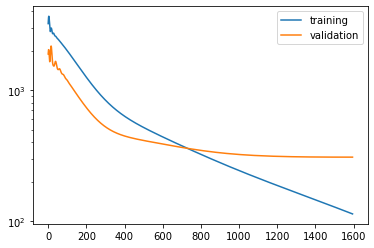

In [34]:
plt.figure()
plt.plot(hist.history['loss'], label='training')
plt.plot(hist.history['val_loss'], label='validation')
plt.legend()
plt.yscale('log')
plt.show()

### Tensorflow-Keras

In [28]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(100,)))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 29,569
Trainable params: 29,569
Non-trainable params: 0
_________________________________________________________________
